## Лабораторная работа EDA-1

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [51]:
import pandas as pd

### Задание 1

Прочитайте средствами pandas файл с данными. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [52]:
df = pd.read_csv('german_credit.csv')

# Вывод базового представления таблицы
print(df.head())  # Печать первых 5 строк
print(df.tail())  # Печать последних 5 строк
print(df.shape)   # Печать размера (количество строк и столбцов)

                status  duration                               credit_history  \
0  no checking account        18      all credits at this bank paid back duly   
1  no checking account         9      all credits at this bank paid back duly   
2           ... < 0 DM        12  no credits taken/all credits paid back duly   
3  no checking account        12      all credits at this bank paid back duly   
4  no checking account        12      all credits at this bank paid back duly   

      purpose  amount                     savings employment_duration  \
0  car (used)    1049  unknown/no savings account              < 1 yr   
1      others    2799  unknown/no savings account    1 <= ... < 4 yrs   
2  retraining     841               ... <  100 DM    4 <= ... < 7 yrs   
3      others    2122  unknown/no savings account    1 <= ... < 4 yrs   
4      others    2171  unknown/no savings account    1 <= ... < 4 yrs   

  installment_rate                   personal_status_sex other_debtors  ..

### Задание 2 

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [53]:
df.isnull().sum()

quantitative_features = ['duration', 'amount', 'age']
binary_features = ['foreign_worker', 'telephone']
ordinal_features = ['employment_duration', 'installment_rate', 'number_credits', 'people_liable']

# Вывод типов данных столбцов
df.dtypes

# Проверка наличия всех признаков в данных
all(col in df.columns for col in quantitative_features), \
all(col in df.columns for col in binary_features), \
all(col in df.columns for col in ordinal_features)



(True, True, True)

### Задание 3 

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [54]:
# Группируем данные по категории 'purpose' и вычисляем среднее значение по колонке 'amount'
average_amount_by_purpose = df.groupby('purpose')['amount'].mean()

# Выводим результат
average_amount_by_purpose

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [55]:
# Фильтруем клиентов моложе 30 лет и старше 40 лет
young_clients = df[df['age'] < 30]
old_clients = df[df['age'] > 40]

# Рассчитываем процент клиентов, снимающих жилье для каждой группы
young_renting_percentage = (young_clients[young_clients['housing'] == 'rent'].shape[0] / young_clients.shape[0]) * 100
old_renting_percentage = (old_clients[old_clients['housing'] == 'rent'].shape[0] / old_clients.shape[0]) * 100

# Выводим результаты
print(f"Процент клиентов моложе 30 лет, снимающих жилье: {young_renting_percentage:.2f}%")
print(f"Процент клиентов старше 40 лет, снимающих жилье: {old_renting_percentage:.2f}%")


Процент клиентов моложе 30 лет, снимающих жилье: 66.67%
Процент клиентов старше 40 лет, снимающих жилье: 68.01%


### Задание 5 

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [56]:
# Фильтруем иностранцев
foreign_workers = df[df['foreign_worker'] == 'yes']

# Отбираем тех, у кого количество кредитов больше 3
foreign_workers_more_than_3_credits = foreign_workers[foreign_workers['number_credits'] > '3']

# Выводим количество таких клиентов
count = foreign_workers_more_than_3_credits.shape[0]
print(f"Количество иностранцев с числом кредитов больше 3: {count}")


Количество иностранцев с числом кредитов больше 3: 1


### Задание 6 

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

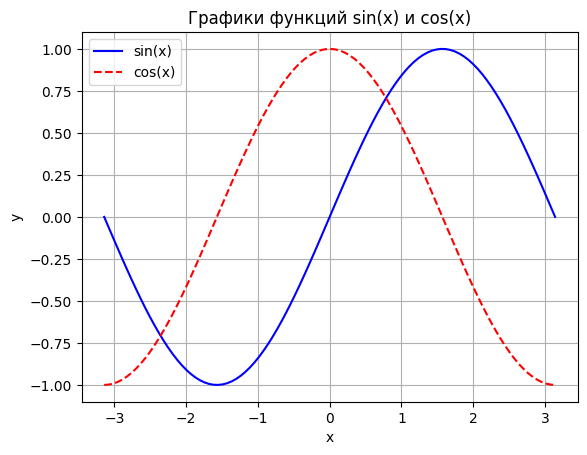

In [58]:
# Создаем массив точек от -pi до pi
x = np.linspace(-np.pi, np.pi, 100)

# Вычисляем значения синуса и косинуса для этих точек
y_sin = np.sin(x)
y_cos = np.cos(x)

# Строим график
plt.plot(x, y_sin, label='sin(x)', color='blue')  # синий цвет для sin(x)
plt.plot(x, y_cos, label='cos(x)', color='red', linestyle='--')  # красный цвет и пунктирная линия для cos(x)

# Добавляем легенду
plt.legend()

# Добавляем сетку
plt.grid(True)

# Подписи осей
plt.xlabel('x')
plt.ylabel('y')

# Заголовок графика
plt.title('Графики функций sin(x) и cos(x)')

# Показываем график
plt.show()

### Задание 7 

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

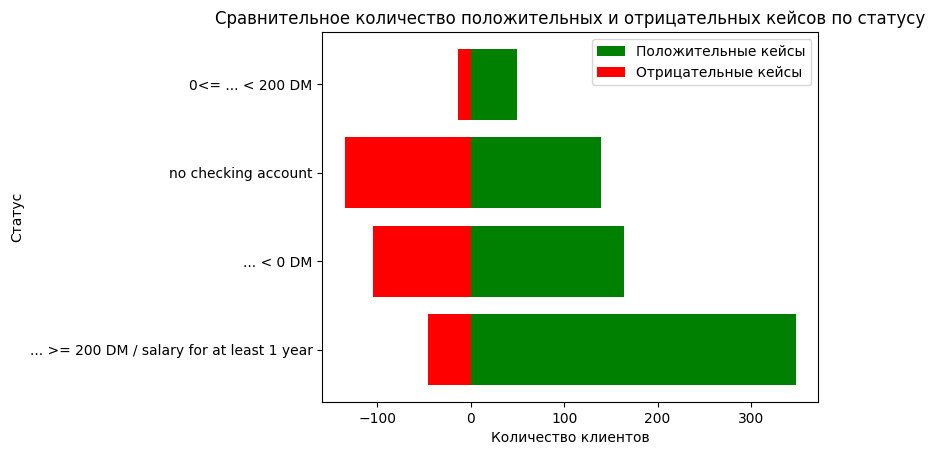

In [59]:
# Разделение данных на положительные и отрицательные кейсы
positive_cases = df[df['credit_risk'] == 'good']['status'].value_counts()
negative_cases = df[df['credit_risk'] == 'bad']['status'].value_counts()

# Строим горизонтальные столбчатые диаграммы
plt.barh(positive_cases.index, positive_cases.values, color='green', label='Положительные кейсы')
plt.barh(negative_cases.index, -negative_cases.values, color='red', label='Отрицательные кейсы')  # Зеркально

# Добавляем легенду
plt.legend()

# Подписи осей
plt.xlabel('Количество клиентов')
plt.ylabel('Статус')

# Заголовок графика
plt.title('Сравнительное количество положительных и отрицательных кейсов по статусу')

# Показываем график
plt.show()


### Задание 8 

In [60]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

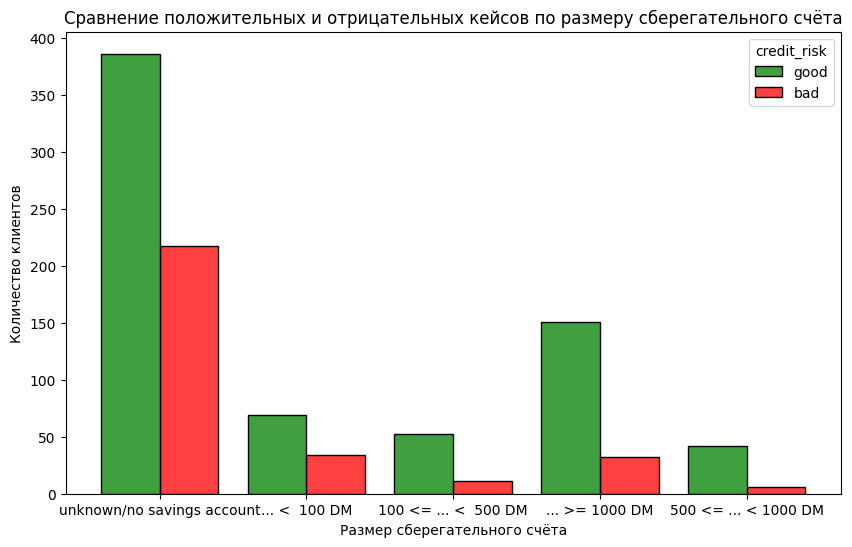

In [61]:
# Строим гистограмму с использованием seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='savings', hue='credit_risk', multiple='dodge', shrink=0.8, palette={'good': 'green', 'bad': 'red'})

# Подписи осей и заголовок
plt.xlabel('Размер сберегательного счёта')
plt.ylabel('Количество клиентов')
plt.title('Сравнение положительных и отрицательных кейсов по размеру сберегательного счёта')

# Показываем график
plt.show()

### Задание 9

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

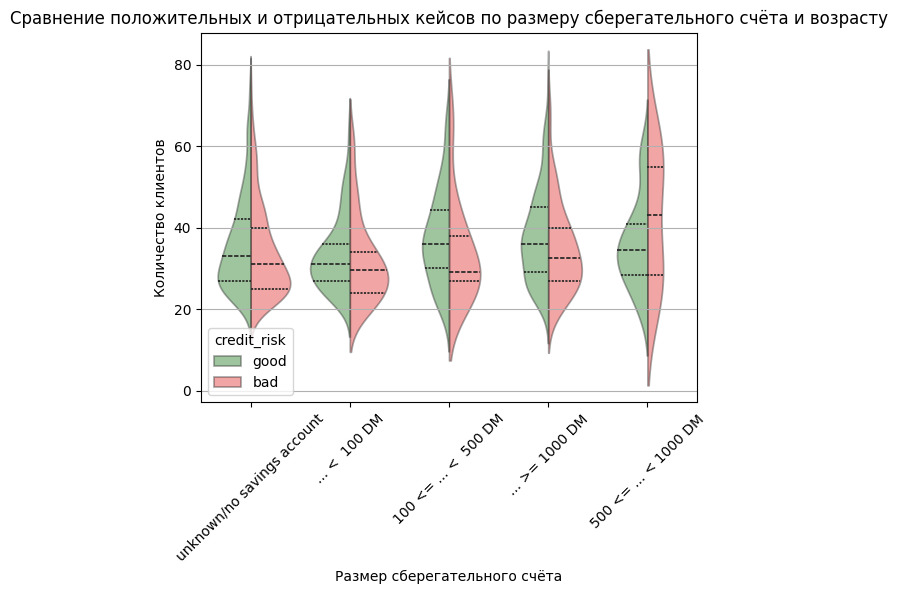

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Строим гистограмму с использованием seaborn
sns.violinplot(
    data=df,
    x='savings',
    y='age',
    hue='credit_risk',
    split=True,
    palette={'good': 'green', 'bad': 'red'},
    alpha=0.4,
    inner="quartile"
)

# Подписи осей и заголовок
plt.xlabel('Размер сберегательного счёта')
plt.ylabel('Количество клиентов')
plt.title('Сравнение положительных и отрицательных кейсов по размеру сберегательного счёта и возрасту')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Показываем график
plt.show()


### Задание 10  

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

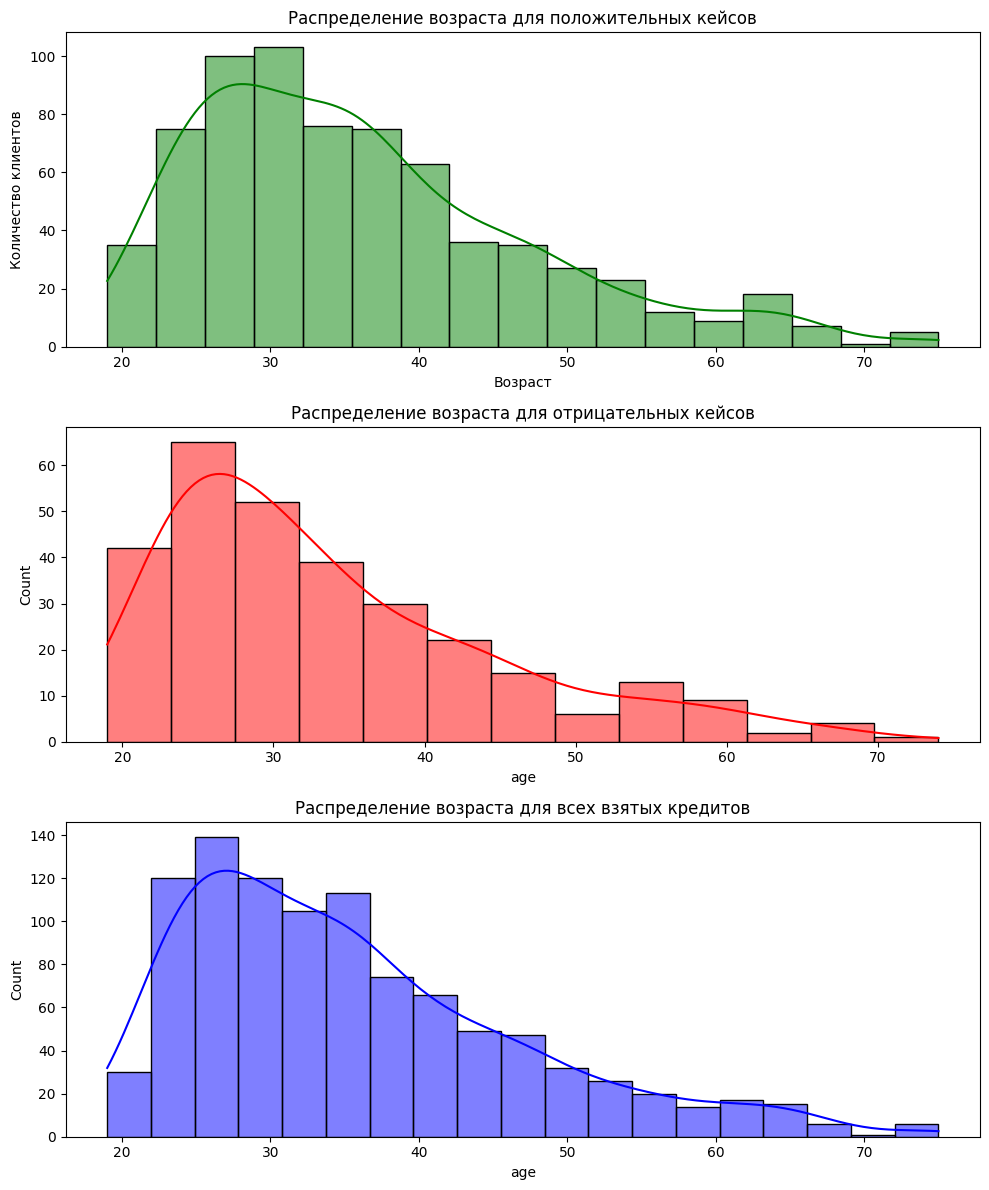

In [63]:
# Создаём фигуру с двумя подграфиками
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Построение распределения по возрасту для положительных
sns.histplot(data=df[df['credit_risk'] == 'good'], x='age', ax=axes[0], color='green', kde=True)
axes[0].set_title('Распределение возраста для положительных кейсов')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество клиентов')

# Построение распределения по возрасту для отрицательных кейсов
sns.histplot(data=df[df['credit_risk'] == 'bad'], x='age', ax=axes[1], color='red', kde=True)
axes[1].set_title('Распределение возраста для отрицательных кейсов')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество клиентов')

# Построение распределения по возрасту для всех клиентов
sns.histplot(data=df, x='age', ax=axes[2], color='blue', kde=True)
axes[2].set_title('Распределение возраста для всех взятых кредитов')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество клиентов')

# Отображаем график
plt.tight_layout()
plt.show()


### Задание 11

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

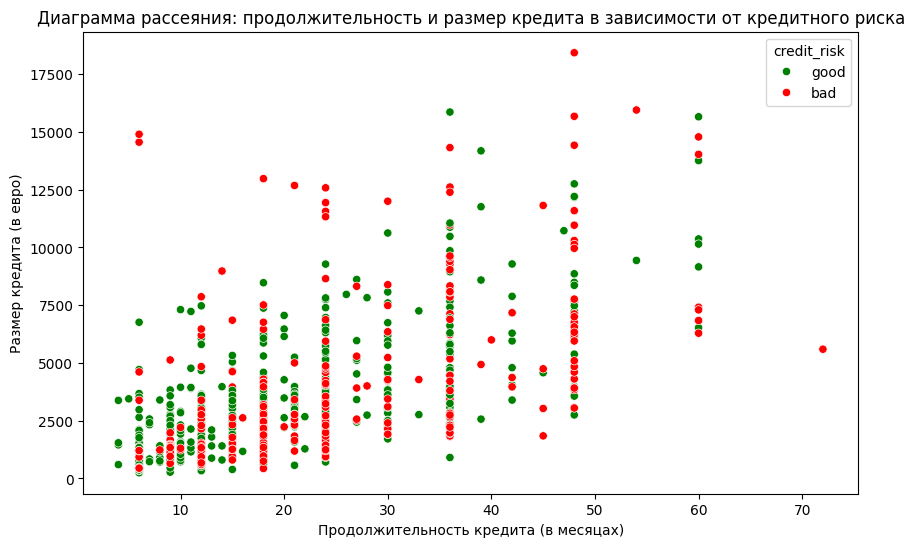

In [64]:
# Строим диаграмму рассеяния с продолжительностью и размерами кредитов на осях
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='amount', hue='credit_risk', palette={'good': 'green', 'bad': 'red'})

# Подписи осей и заголовок
plt.xlabel('Продолжительность кредита (в месяцах)')
plt.ylabel('Размер кредита (в евро)')
plt.title('Диаграмма рассеяния: продолжительность и размер кредита в зависимости от кредитного риска')

# Показываем график
plt.show()

### Задание 12 

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

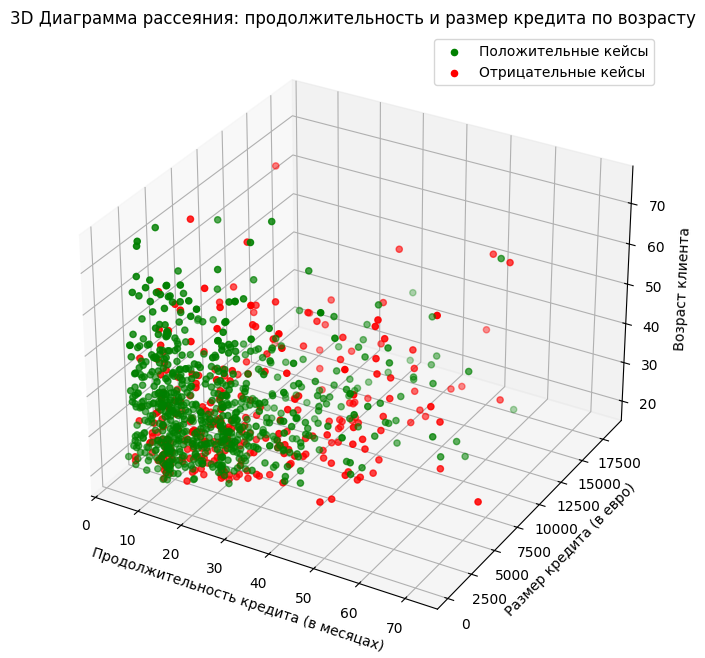

In [65]:
from mpl_toolkits.mplot3d import Axes3D

# Создаём фигуру для 3D графика
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Разделяем данные на положительные и отрицательные кейсы
positive_cases = df[df['credit_risk'] == 'good']
negative_cases = df[df['credit_risk'] == 'bad']

# Строим 3D рассеяние для положительных кейсов
ax.scatter(positive_cases['duration'], positive_cases['amount'], positive_cases['age'], color='green', label='Положительные кейсы')

# Строим 3D рассеяние для отрицательных кейсов
ax.scatter(negative_cases['duration'], negative_cases['amount'], negative_cases['age'], color='red', label='Отрицательные кейсы')

# Подписи осей
ax.set_xlabel('Продолжительность кредита (в месяцах)')
ax.set_ylabel('Размер кредита (в евро)')
ax.set_zlabel('Возраст клиента')

# Заголовок графика
ax.set_title('3D Диаграмма рассеяния: продолжительность и размер кредита по возрасту')

# Легенда
ax.legend()

# Показываем график
plt.show()

### Задание 13 

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [66]:
from sklearn.preprocessing import OrdinalEncoder

# Порядковые признаки
ordinal_features = ['employment_duration', 'installment_rate', 'number_credits', 'people_liable']

# Бинарные признаки
binary_features = ['foreign_worker', 'telephone']

# Категориальные признаки, которые нужно удалить
categorical_features = ['job', 'housing', 'credit_risk']  # Можно добавить другие категориальные признаки

# Кодируем порядковые признаки
encoder = OrdinalEncoder()
df[ordinal_features] = encoder.fit_transform(df[ordinal_features])

# Кодируем бинарные признаки (преобразуем их в 0 и 1)
df[binary_features] = df[binary_features].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Удаляем категориальные признаки
df.drop(columns=categorical_features, inplace=True)

# Проверим результат
df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,number_credits,people_liable,telephone,foreign_worker
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,2.0,2.0,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,0.0,0.0,0.0,0
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,0.0,1.0,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,1.0,1.0,0.0,0
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,1.0,1.0,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,0.0,0.0,0.0,0
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,0.0,0.0,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,1.0,1.0,0.0,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,0.0,2.0,male : married/widowed,none,>= 7 yrs,car or other,38,bank,1.0,0.0,0.0,1


### Задание 14 

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Преобразуем целевую переменную в 0 и 1
df['credit_risk'] = df['status'].apply(lambda x: 1 if x == 'good' else 0)

# Обрабатываем категориальные столбцы, применяя LabelEncoder к каждому столбцу с ненумерическими данными
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # Проверяем, содержит ли столбец категориальные данные
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])  # Кодируем категориальный столбец
        label_encoders[column] = le  # Сохраняем энкодер, если потребуется для обратного преобразования

# Теперь df должен содержать числовые значения для всех столбцов
X = df.drop('credit_risk', axis=1).values
y = df['credit_risk'].values

# Разделяем данные на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Реализуем функцию для прогнозирования целевой переменной
def predict(Xtest: np.array) -> np.array:
    weights = np.ones(Xtest.shape[1])  # Используем столько весов, сколько признаков
    threshold = 1.5  # Порог для принятия решения
    
    # Вычисляем линейную комбинацию признаков
    prediction_scores = np.dot(Xtest, weights)  
    predictions = prediction_scores > threshold  # Прогнозируем 1 (good) или 0 (bad)
    
    return predictions.astype(int)

# Оценка точности на тестовой выборке
accuracy = accuracy_score(y_test, predict(X_test))
print(f"Точность на тестовой выборке: {accuracy:.2f}")


Точность на тестовой выборке: 0.40
